In [1]:
import glob
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import shapely
import matplotlib.colors as colors
from IPython.display import clear_output
from tqdm.notebook import tqdm
import time
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\rmpjazz\AppData\Local\Temp\ipykernel_26280\1679906244.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
cell_geo = pd.read_pickle("./dataframes/cell_geometry")
cell = geopandas.GeoDataFrame(cell_geo, columns=['geometry'], 
                                 crs='epsg:4326')

jsonfile = ('./ark28722-s73w23-geojson.json')
world = geopandas.read_file(jsonfile)

dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_values"

dataframe = pd.read_pickle(dataframe_name)
cell["interpolated_value"] = dataframe.copy()

In [11]:
####### PLOTTING
import matplotlib.colors as colors

def plotter(dataset):
    cell["interpolated_value"] = dataset
    ax = cell.plot(column='interpolated_value', figsize=(10, 10), cmap='plasma', legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (8,8))
    return ax
def log_plotter(dataset):
    cell["interpolated_value"] = dataset
    ax = cell.plot(column='interpolated_value', figsize=(10, 10), cmap='plasma', norm=colors.SymLogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max(), linthresh = 0.02), legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (8,8))


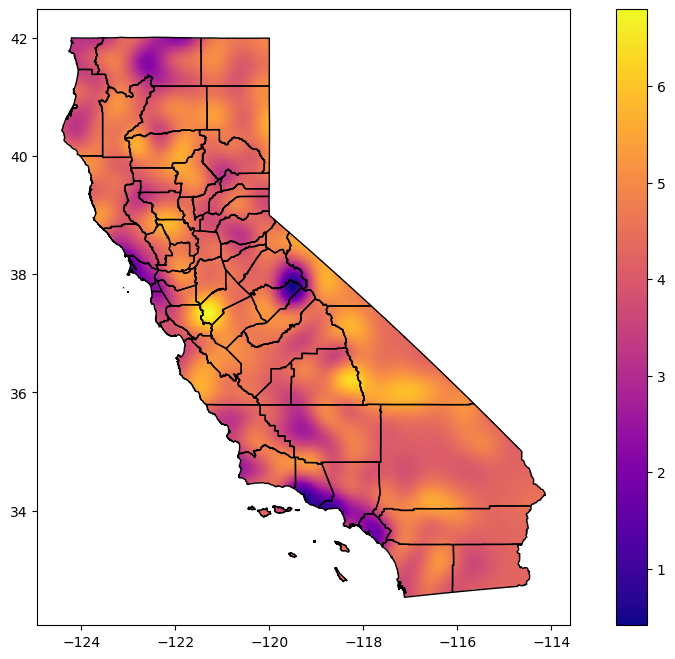

In [3]:
dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_values"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

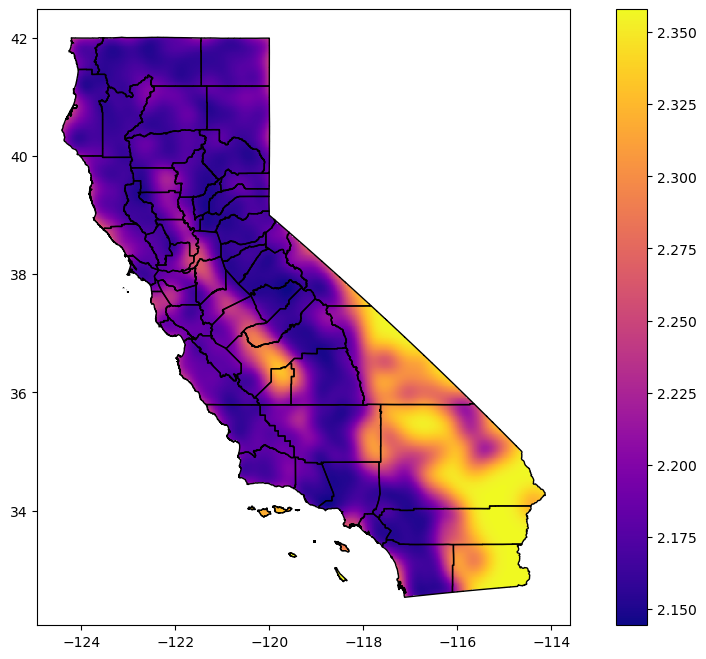

In [7]:
dataframe_name = "./dataframes/2000-2019/ordinary_kriging_gaussian_geographic_nlags_10_std"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

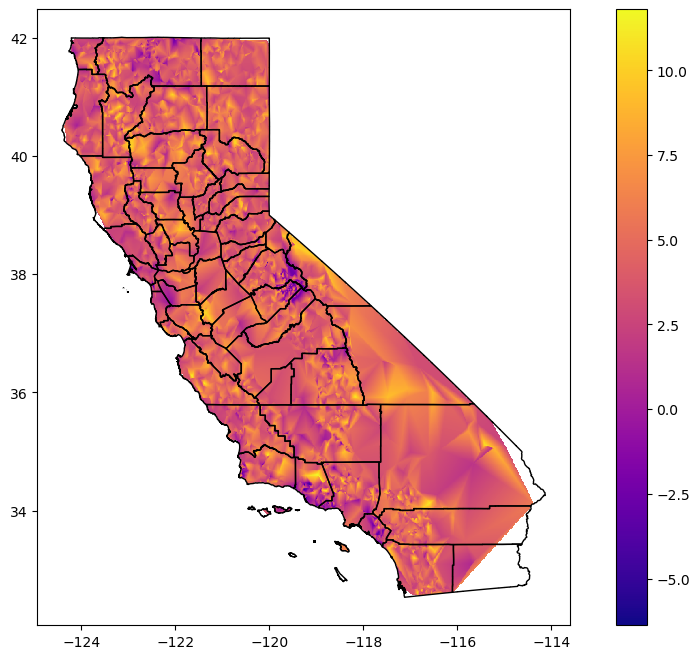

In [9]:
dataframe_name = "./dataframes/2000-2019/linear_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

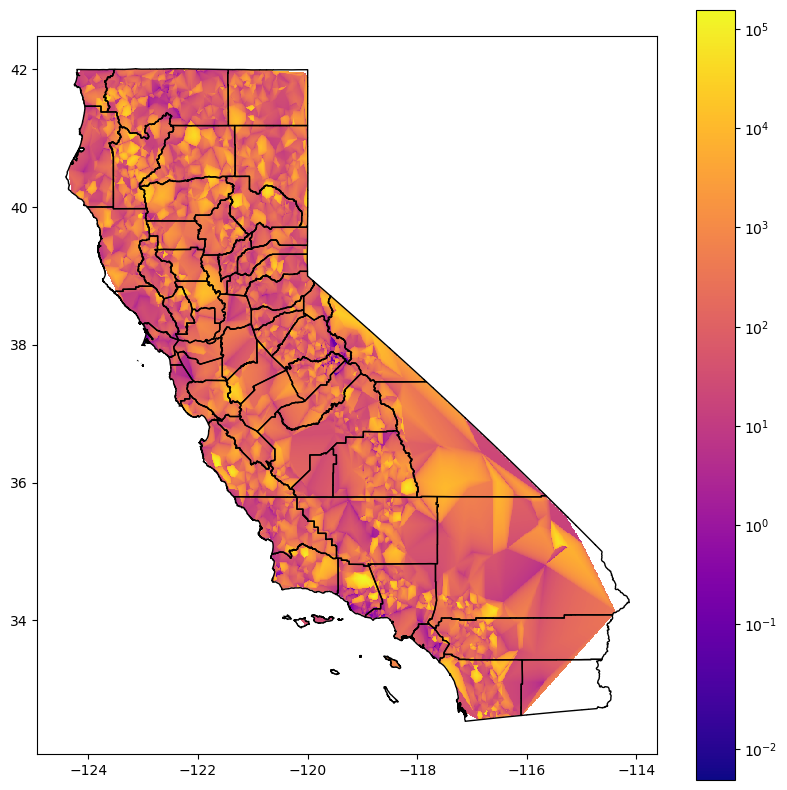

In [12]:
dataframe_name = "./dataframes/2000-2019/linear_interpolation_normal"
dataframe = pd.read_pickle(dataframe_name)
log_plotter(dataframe)

<Axes: >

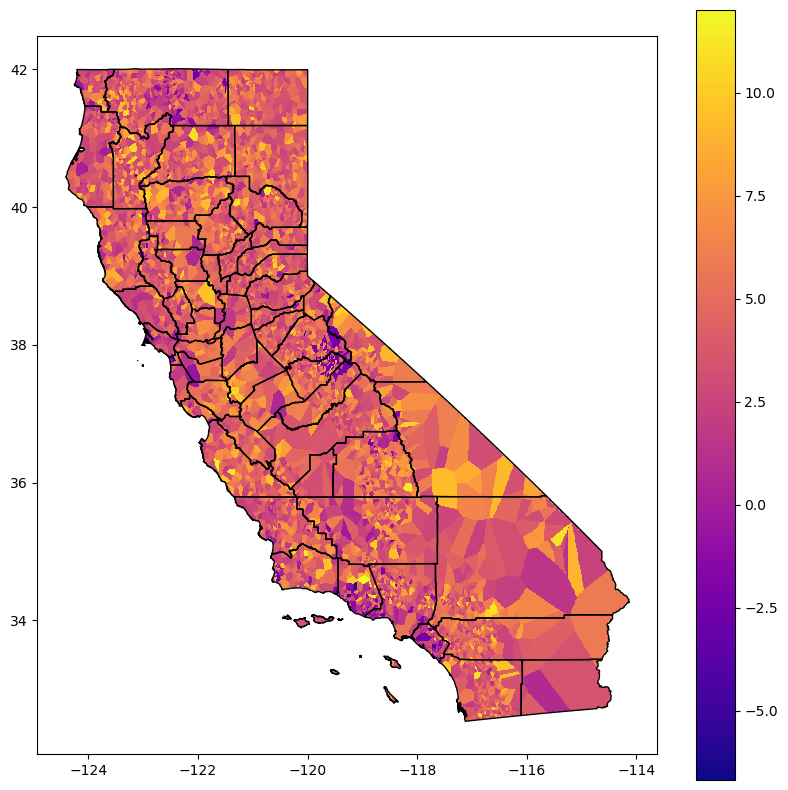

In [13]:
dataframe_name = "./dataframes/2000-2019/nearest_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)

In [ ]:
dataframe_name = "./dataframes/2000-2019/linear_interpolation_log"
dataframe = pd.read_pickle(dataframe_name)
plotter(dataframe)